# The impact of fitness wearables on consumer behavior

In [1]:
#Import Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/Users/kenne/Documents/survey 605.csv")

In [5]:
# Read the first 5 rows
df.head()

,Timestamp,What is your age?,What is your gender?,What is your highest level of education?,What is your current occupation?,How often do you exercise in a week?,How long have you been using a fitness wearable?,How frequently do you use your fitness wearable?,How often do you track fitness data using wearable?,How has the fitness wearable impacted your fitness routine?,...,How engaged do you feel with your fitness wearable?,Does using a fitness wearable make you feel more connected to the fitness community?,How has the fitness wearable helped you achieve your fitness goals?,How has the fitness wearable impacted your overall health?,Has the fitness wearable improved your sleep patterns?,Do you feel that the fitness wearable has improved your overall well-being?,Has using a fitness wearable influenced your decision? [To exercise more?],Has using a fitness wearable influenced your decision? [To purchase other fitness-related products?],Has using a fitness wearable influenced your decision? [To join a gym or fitness class?],Has using a fitness wearable influenced your decision? [To change your diet?]
0,2023/03/30 9:43:19 PM GMT+5:30,18-24,Male,Some college or associate degree,Student,5 or more times a week,Less than 6 months,Daily,Every day,Positively impacted my fitness routine,...,Very engaged,Agree,No impact on achieving my goals,No impact on my overall health,Agree,Neutral,Strongly agree,Neutral,Agree,Agree
1,2023/03/31 5:07:46 PM GMT+5:30,Under 18,Male,Bachelor's degree,Student,5 or more times a week,Less than 6 months,3-4 times a week,Once a week,Positively impacted my fitness routine,...,Somewhat engaged,Agree,Helped me achieve my goals somewhat more quickly,Improved my overall health somewhat,Agree,Strongly agree,Agree,Neutral,Neutral,Neutral
2,2023/03/31 7:44:46 PM GMT+5:30,18-24,Female,Bachelor's degree,Student,Less than once a week,Less than 6 months,Rarely,Rarely,Positively impacted my fitness routine,...,Not very engaged,Strongly agree,Helped me achieve my goals much more quickly,Improved my overall health significantly,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Agree
3,2023/03/31 9:36:07 PM GMT+5:30,25-34,Female,Some college or associate degree,Employed part-time,3-4 times a week,6-12 months,3-4 times a week,Every day,I don't know,...,Somewhat engaged,Strongly agree,Helped me achieve my goals somewhat more quickly,Improved my overall health somewhat,Agree,Strongly agree,Agree,Disagree,Neutral,Agree
4,2023/03/31 9:37:32 PM GMT+5:30,18-24,Male,Bachelor's degree,Student,1-2 times a week,Less than 6 months,Daily,Every other day,Positively impacted my fitness routine,...,Neutral,Agree,Helped me achieve my goals much more quickly,Improved my overall health significantly,Agree,Strongly agree,Agree,Neutral,Agree,Strongly agree


In [6]:
# What is the shape of the dataset?
df.shape

(30, 22)

The dataset has 30 rows and 22 columns

In [7]:
# Read the existing columns
df.columns

Index(['Timestamp', 'What is your age?', 'What is your gender?',
       'What is your highest level of education?',
       'What is your current occupation?',
       'How often do you exercise in a week?',
       'How long have you been using a fitness wearable?',
       'How frequently do you use your fitness wearable?',
       'How often do you track fitness data using wearable?',
       'How has the fitness wearable impacted your fitness routine?',
       'Has the fitness wearable helped you stay motivated to exercise?',
       'Do you think that the fitness wearable has made exercising more enjoyable?',
       'How engaged do you feel with your fitness wearable?',
       'Does using a fitness wearable make you feel more connected to the fitness community?',
       'How has the fitness wearable helped you achieve your fitness goals?',
       'How has the fitness wearable impacted your overall health?',
       'Has the fitness wearable improved your sleep patterns?',
       'Do you f

In [8]:
# Check for missing data
df.isnull().sum()

Timestamp                                                                                               0
What is your age?                                                                                       0
What is your gender?                                                                                    0
What is your highest level of education?                                                                0
What is your current occupation?                                                                        0
How often do you exercise in a week?                                                                    0
How long have you been using a fitness wearable?                                                        0
How frequently do you use your fitness wearable?                                                        0
How often do you track fitness data using wearable?                                                     0
How has the fitness wearable impacted your fit

The dataset has no null values

In [9]:
# Check for the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 22 columns):
 #   Column                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                --------------  ----- 
 0   Timestamp                                                                                             30 non-null     object
 1   What is your age?                                                                                     30 non-null     object
 2   What is your gender?                                                                                  30 non-null     object
 3   What is your highest level of education?                                                              30 non-null     object
 4   What is your current occupation?                                                                      30 non-nul

In [10]:
# Delete the Timestamp column
df.drop(['Timestamp'], axis=1, inplace=True)

In [11]:
# Rename the columns
df.rename(columns={'What is your age?':'Age', 'What is your gender?':'Gender', 
'What is your highest level of education?':'Education', 'What is your current occupation?':'Occupation', 
'How often do you exercise in a week?':'Workout Freq per Week', 
'How long have you been using a fitness wearable?':'Usage Duration', 
'How frequently do you use your fitness wearable?':'Freq Usage', 
'How often do you track fitness data using wearable?':'Tracking data', 
'How has the fitness wearable impacted your fitness routine?':'Fitness Routine', 
'Has the fitness wearable helped you stay motivated to exercise?':'Motivation', 
'Do you think that the fitness wearable has made exercising more enjoyable?':'Enjoyment', 
'How engaged do you feel with your fitness wearable?':'Engagement', 
'Does using a fitness wearable make you feel more connected to the fitness community?':'Connection', 
'How has the fitness wearable helped you achieve your fitness goals?':'Fitness Goals', 
'How has the fitness wearable impacted your overall health?':'Health', 
'Has the fitness wearable improved your sleep patterns?':'Sleep', 
'Do you feel that the fitness wearable has improved your overall well-being?':'Well Being', 
'Has using a fitness wearable influenced your decision? [To exercise more?]':'Exercise More', 
'Has using a fitness wearable influenced your decision? [To purchase other fitness-related products?]':'Purchase Products', 
'Has using a fitness wearable influenced your decision? [To join a gym or fitness class?]':'Join Gym', 
'Has using a fitness wearable influenced your decision? [To change your diet?]':'Change Diet'}, inplace=True)

In [12]:
# Recheck the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    30 non-null     object
 1   Gender                 30 non-null     object
 2   Education              30 non-null     object
 3   Occupation             30 non-null     object
 4   Workout Freq per Week  30 non-null     object
 5   Usage Duration         30 non-null     object
 6   Freq Usage             30 non-null     object
 7   Tracking data          30 non-null     object
 8   Fitness Routine        30 non-null     object
 9   Motivation             30 non-null     object
 10  Enjoyment              30 non-null     object
 11  Engagement             30 non-null     object
 12  Connection             30 non-null     object
 13  Fitness Goals          30 non-null     object
 14  Health                 30 non-null     object
 15  Sleep                  30

## Exploratory Data Analysis

### 1. What is the age distribution of the consumers

In [17]:
age_distribution = df['Age'].value_counts()
print(age_distribution)

18-24       10
25-34        6
Under 18     5
35-44        4
45-54        3
55-64        2
Name: Age, dtype: int64


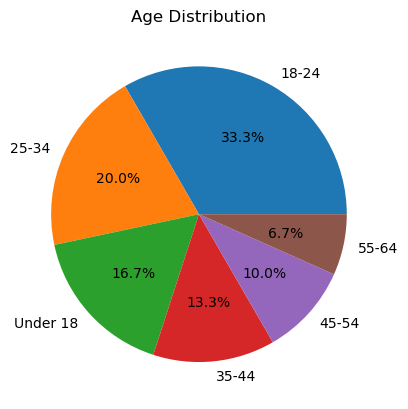

In [18]:
# Create pie chart
fig, ax = plt.subplots()
ax.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%')
ax.set_title('Age Distribution')

plt.show()

1. There are 10 individuals in the '18-24' age range, representing 33.3%.
2. There are 6 individuals in the '25-34' age range, representing 20.0%.
3. There are 5 individuals in the 'Under 18' age range, representing 16.7%.
4. There are 4 individuals in the '35-44' age range, representing 13.3%.
5. There are 3 individuals in the '45-54' age range, representing 10.0%.
6. There are 2 individuals in the '55-64' age range, representing 6.7%.

### 2. What is the gender distribution of the consumers

In [21]:
#Counts of each gender
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)

Female               15
Male                 13
Prefer not to say     2
Name: Gender, dtype: int64


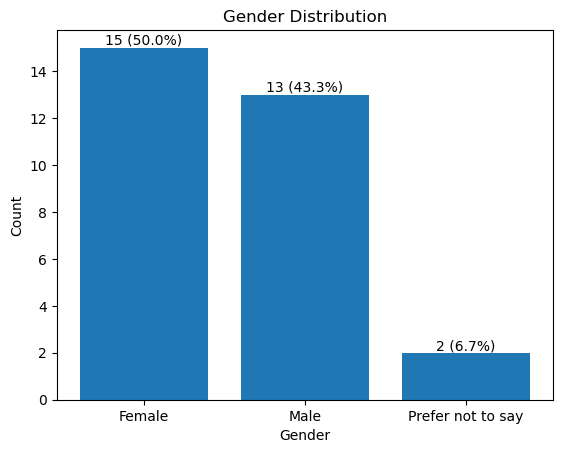

In [26]:
#Visualization
# Create bar chart
fig, ax = plt.subplots()
bars = ax.bar(gender_distribution.index, gender_distribution)

# Add counts above the two bars
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / gender_distribution.sum())*100  # calculate percentage
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)} ({percentage:.1f}%)', 
            ha='center', va='bottom')

ax.set_title('Gender Distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

plt.show()



50% of the consumers that participated in this study were of the Female gender, 43.3% male and 6.7% did not disclose their gender

### 3. What is the education distribution of customers?

In [27]:
education_level =df['Education'].value_counts()
print(education_level)

Bachelor's degree                   8
High school diploma                 6
Doctorate or professional degree    6
Master's degree                     5
Some college or associate degree    4
Less than high school               1
Name: Education, dtype: int64


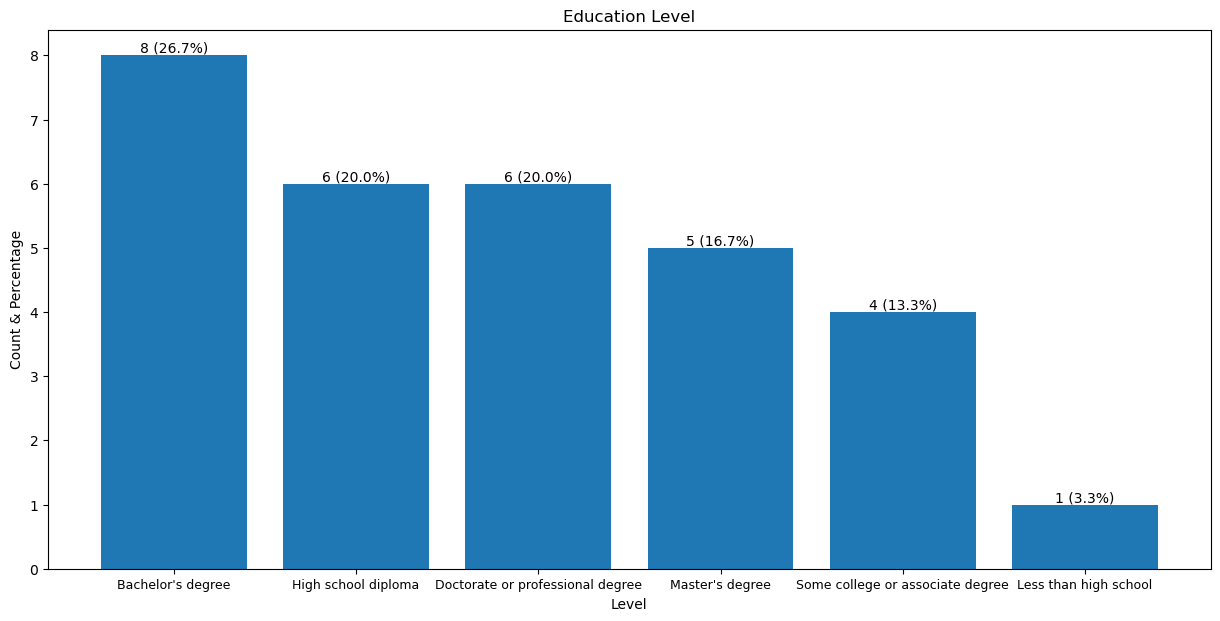

In [41]:
#Visualization
# Create bar chart
fig, ax = plt.subplots(figsize=(15, 7))
bars = ax.bar(education_level.index, education_level)

# Add counts above the two bars
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / education_level.sum())*100  # calculate percentage
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)} ({percentage:.1f}%)', 
            ha='center', va='bottom')

ax.set_title('Education Level')
ax.set_xlabel('Level')
ax.set_ylabel('Count & Percentage')
plt.xticks(fontsize=9)

plt.show()

Most of the consumers have attained the bachelor's degree at 26.7%

### 4. What is the occupation distribution of customers?

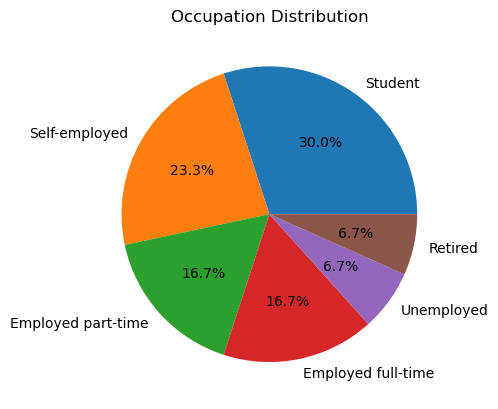

In [42]:
# Calculate the count of each occupation
occupation_count = df['Occupation'].value_counts()

# Create pie chart
fig, ax = plt.subplots()
ax.pie(occupation_count, labels=occupation_count.index, autopct='%1.1f%%')
ax.set_title('Occupation Distribution')

plt.show()


### 5. What is the workout frequency recorded?

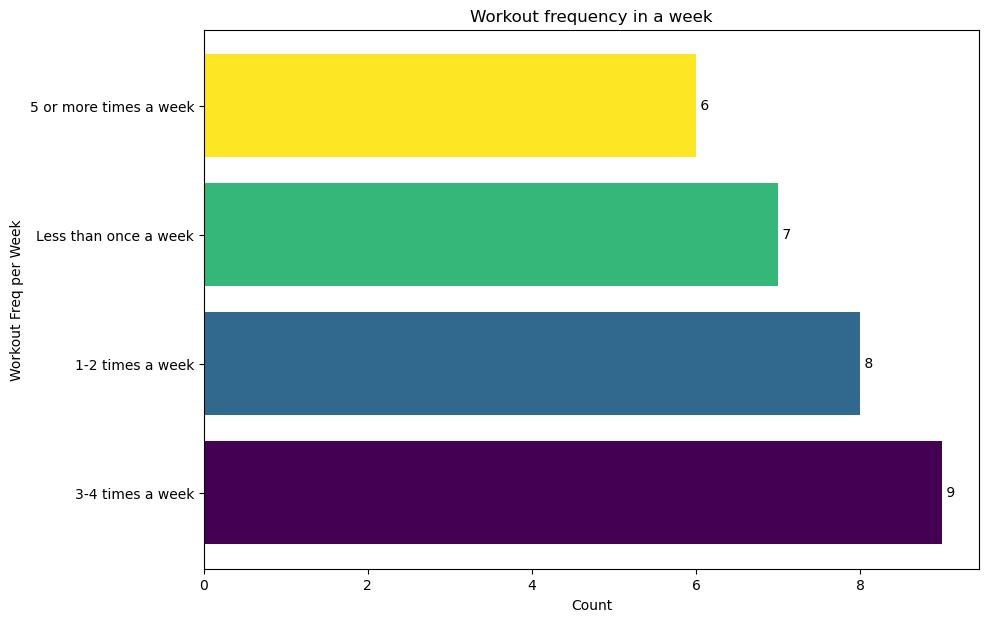

In [48]:
# Get workout frequency count
workout_week = df['Workout Freq per Week'].value_counts()

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar chart with colormap
bars = ax.barh(workout_week.index, workout_week, color=plt.cm.viridis(np.linspace(0, 1, len(workout_week))))

ax.set_xlabel('Count')
ax.set_ylabel('Workout Freq per Week')
ax.set_title('Workout frequency in a week')

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f' {width}', va='center', fontsize=10)

plt.show()


### 6. How long have they been using a fitness wearable?

In [50]:
wearables =df['Usage Duration'].value_counts()
print(wearables)

Less than 6 months    13
6-12 months           10
1-2 years              5
More than 2 years      2
Name: Usage Duration, dtype: int64


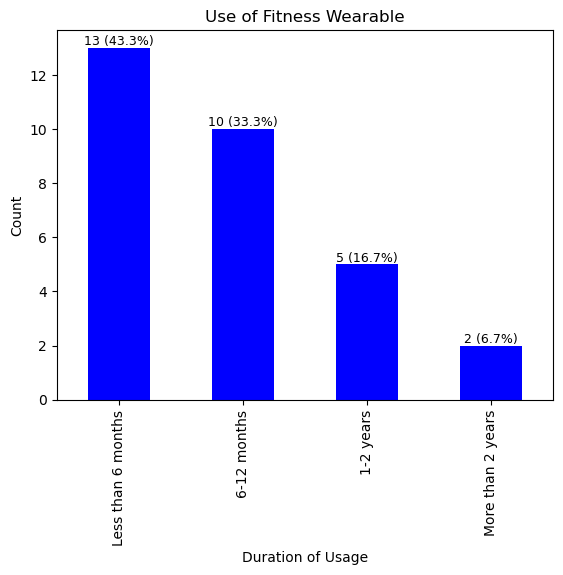

In [57]:
# Calculate total count
total = wearables.sum()
#Visualisation
wearables.plot(kind='bar', color='blue')
plt.xlabel('Duration of Usage')
plt.ylabel('Count')
plt.title('Use of Fitness Wearable')

# Add count labels and percentage labels to the bars
for i, count in enumerate(wearables):
    percentage = count / total * 100
    plt.text(i, count + 0.1, f'{count} ({percentage:.1f}%)', ha='center', fontsize=9)

plt.show()

### 7. How is the frequency of use?

3-4 times a week    11
Daily                8
1-2 times a week     8
Rarely               3
Name: Freq Usage, dtype: int64


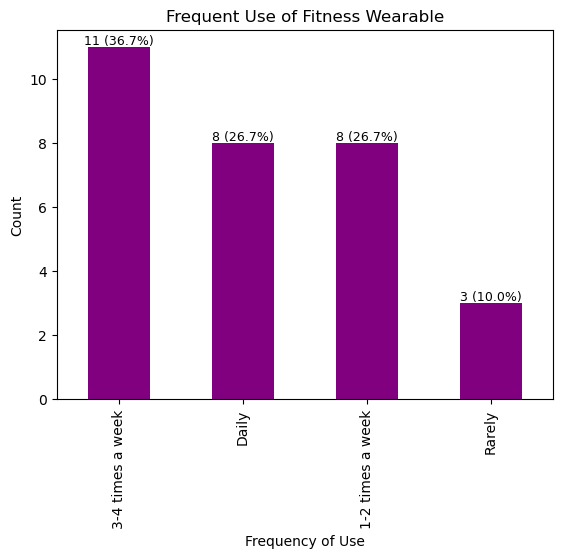

In [59]:
frequency_usage = df['Freq Usage'].value_counts()
print(frequency_usage)

totalf=frequency_usage.sum()
frequency_usage.plot(kind='bar', color='purple')
plt.xlabel('Frequency of Use')
plt.ylabel('Count')
plt.title('Frequent Use of Fitness Wearable')

# add labels to the bars
for i, count in enumerate(frequency_usage):
    percentage = count / totalf * 100
    plt.text(i, count+0.1, f'{count} ({percentage:.1f}%)', ha='center', fontsize=9)

plt.show()

### 8. How often do they track fitness data using wearable?

Every day          9
Once a week        8
Every other day    8
Once a month       3
Rarely             2
Name: Tracking data, dtype: int64


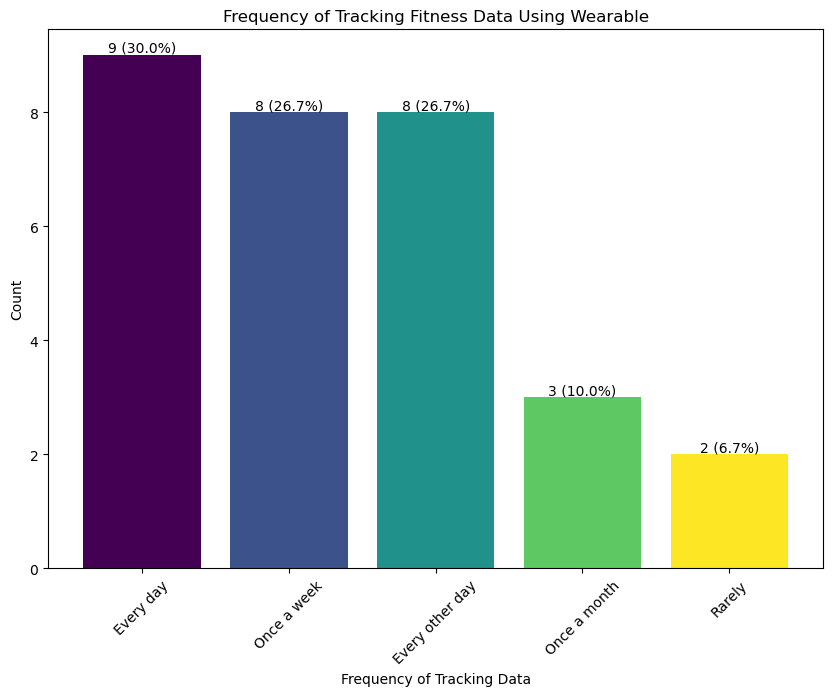

In [60]:
# Count the unique values in the 'Tracking data' column
tracking_data_counts = df['Tracking data'].value_counts()
print(tracking_data_counts)
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(tracking_data_counts.index, tracking_data_counts, color=plt.cm.viridis(np.linspace(0, 1, len(tracking_data_counts))))

ax.set_xlabel('Frequency of Tracking Data')
ax.set_ylabel('Count')
ax.set_title('Frequency of Tracking Fitness Data Using Wearable')

# Add count labels and percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    percentage = (height / tracking_data_counts.sum()) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)} ({percentage:.1f}%)', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


### 10. How has the fitness wearable impacted their fitness routine?

Positively impacted my fitness routine    24
I don't know                               4
No impact on my fitness routine            1
Negatively impacted my fitness routine     1
Name: Fitness Routine, dtype: int64


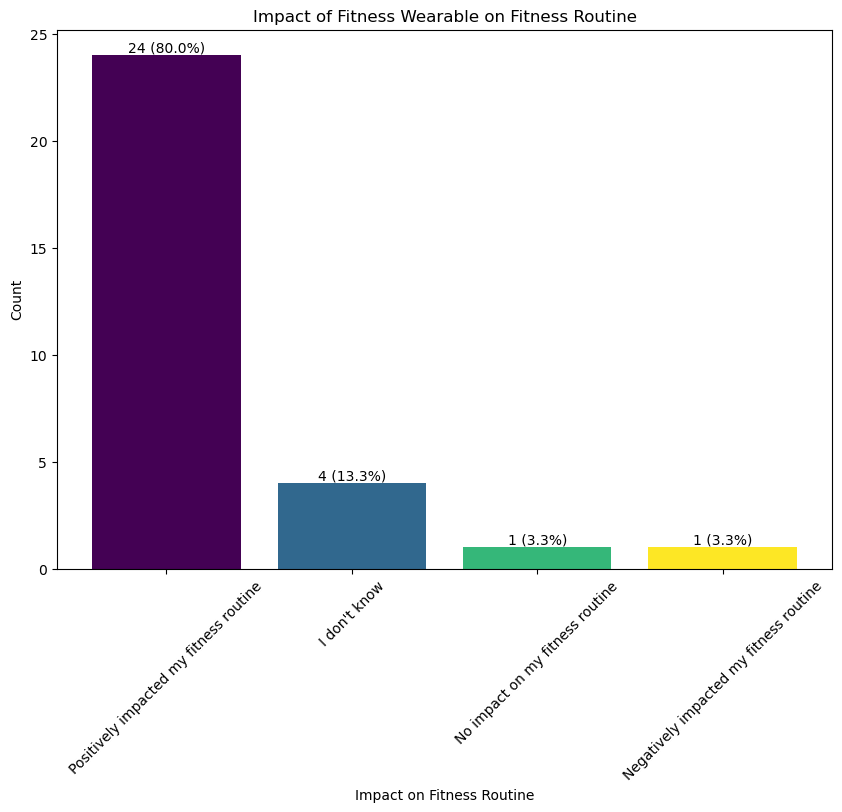

In [66]:
# Count the unique values in the 'Fitness Routine' column
fitness_routine_counts = df['Fitness Routine'].value_counts()
print(fitness_routine_counts)
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(fitness_routine_counts.index, fitness_routine_counts, color=plt.cm.viridis(np.linspace(0, 1, len(fitness_routine_counts))))

ax.set_xlabel('Impact on Fitness Routine')
ax.set_ylabel('Count')
ax.set_title('Impact of Fitness Wearable on Fitness Routine')

# Add count labels and percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    percentage = (height / fitness_routine_counts.sum()) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)} ({percentage:.1f}%)', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()



### 11. Has the fitness wearable helped them stay motivated to exercise?

Strongly agree       16
Agree                 8
Neutral               5
Strongly disagree     1
Name: Motivation, dtype: int64


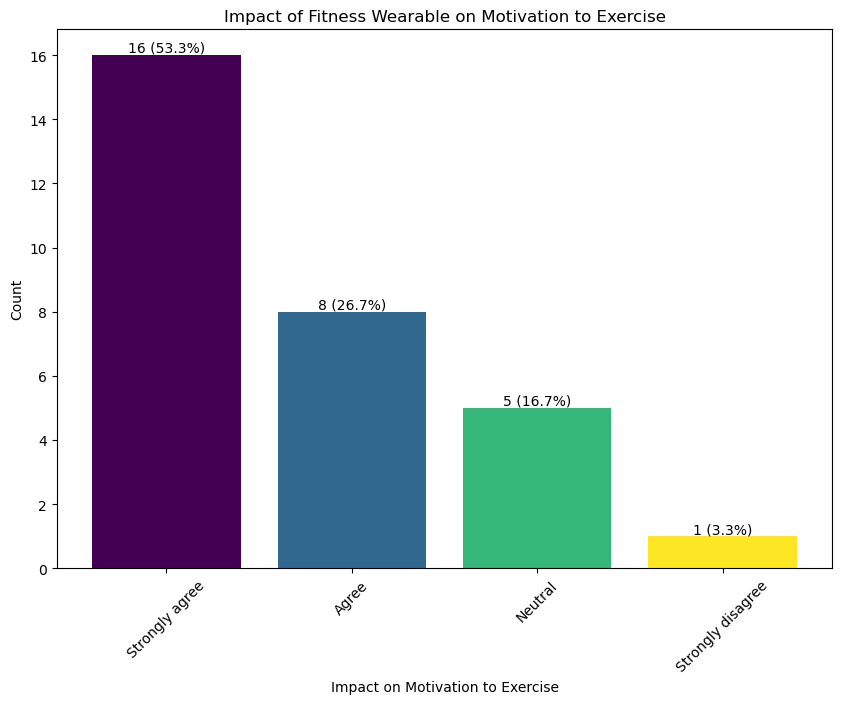

In [65]:
# Count the unique values in the 'Motivation' column
motivation_counts = df['Motivation'].value_counts()
print(motivation_counts)
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(motivation_counts.index, motivation_counts, color=plt.cm.viridis(np.linspace(0, 1, len(motivation_counts))))

ax.set_xlabel('Impact on Motivation to Exercise')
ax.set_ylabel('Count')
ax.set_title('Impact of Fitness Wearable on Motivation to Exercise')

# Add count labels and percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    percentage = (height / motivation_counts.sum()) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)} ({percentage:.1f}%)', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


### 12. Do you think that the fitness wearable has made exercising more enjoyable for customers?

Strongly agree    12
Agree             12
Neutral            5
Disagree           1
Name: Enjoyment, dtype: int64


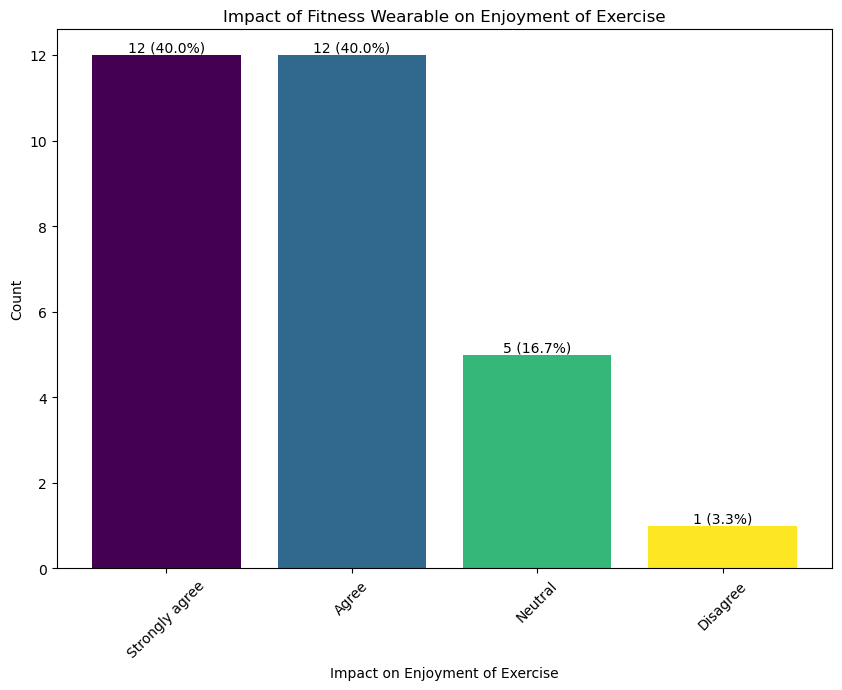

In [67]:
# Count the unique values in the 'Enjoyment' column
enjoyment_counts = df['Enjoyment'].value_counts()
print(enjoyment_counts)
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(enjoyment_counts.index, enjoyment_counts, color=plt.cm.viridis(np.linspace(0, 1, len(enjoyment_counts))))

ax.set_xlabel('Impact on Enjoyment of Exercise')
ax.set_ylabel('Count')
ax.set_title('Impact of Fitness Wearable on Enjoyment of Exercise')

# Add count labels and percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    percentage = (height / enjoyment_counts.sum()) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)} ({percentage:.1f}%)', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


### 13. How engaged do they feel with your fitness wearable?

Somewhat engaged    11
Very engaged        10
Neutral              7
Not very engaged     2
Name: Engagement, dtype: int64


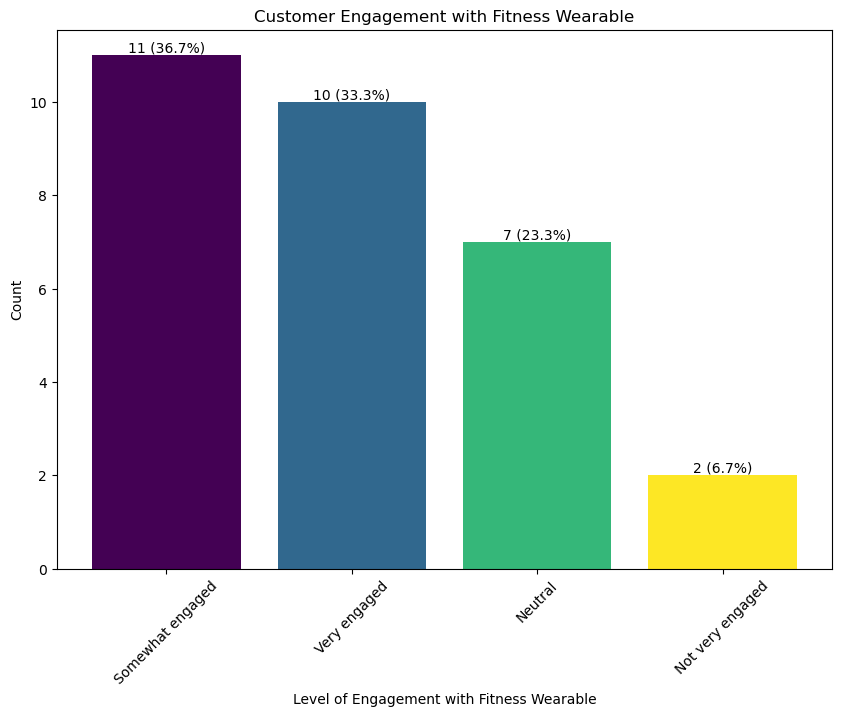

In [68]:
# Count the unique values in the 'Engagement' column
engagement_counts = df['Engagement'].value_counts()
print(engagement_counts)
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(engagement_counts.index, engagement_counts, color=plt.cm.viridis(np.linspace(0, 1, len(engagement_counts))))

ax.set_xlabel('Level of Engagement with Fitness Wearable')
ax.set_ylabel('Count')
ax.set_title('Customer Engagement with Fitness Wearable')

# Add count labels and percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    percentage = (height / engagement_counts.sum()) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)} ({percentage:.1f}%)', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


### 14. Does using a fitness wearable make them feel more connected to the fitness community?

Agree             13
Strongly agree    10
Neutral            7
Name: Connection, dtype: int64


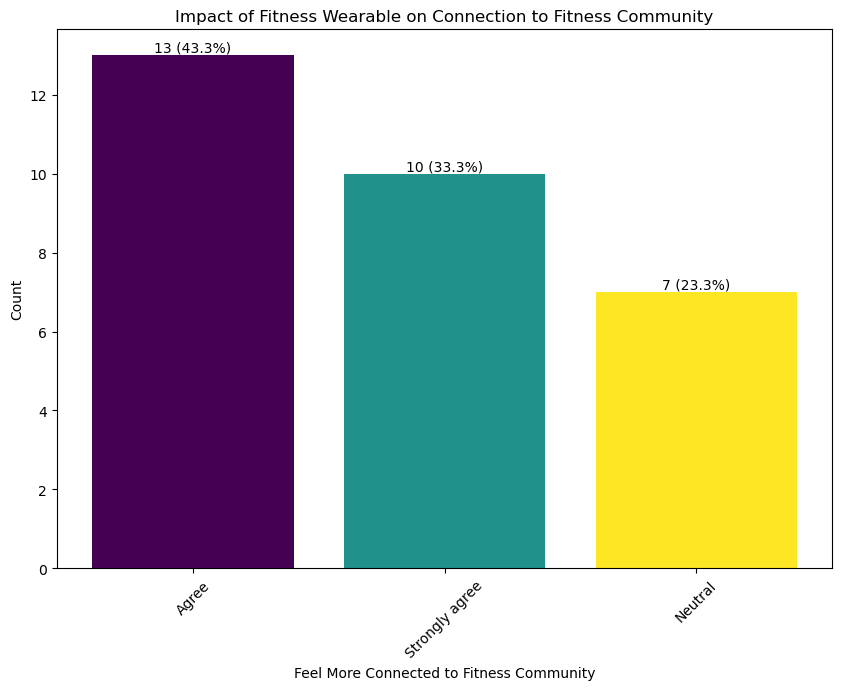

In [69]:
# Count the unique values in the 'Connection' column
connection_counts = df['Connection'].value_counts()
print(connection_counts)
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(connection_counts.index, connection_counts, color=plt.cm.viridis(np.linspace(0, 1, len(connection_counts))))

ax.set_xlabel('Feel More Connected to Fitness Community')
ax.set_ylabel('Count')
ax.set_title('Impact of Fitness Wearable on Connection to Fitness Community')

# Add count labels and percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    percentage = (height / connection_counts.sum()) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)} ({percentage:.1f}%)', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


### 15. How has the fitness wearable helped them achieve your fitness goals?

Helped me achieve my goals somewhat more quickly    15
Helped me achieve my goals much more quickly        13
No impact on achieving my goals                      2
Name: Fitness Goals, dtype: int64


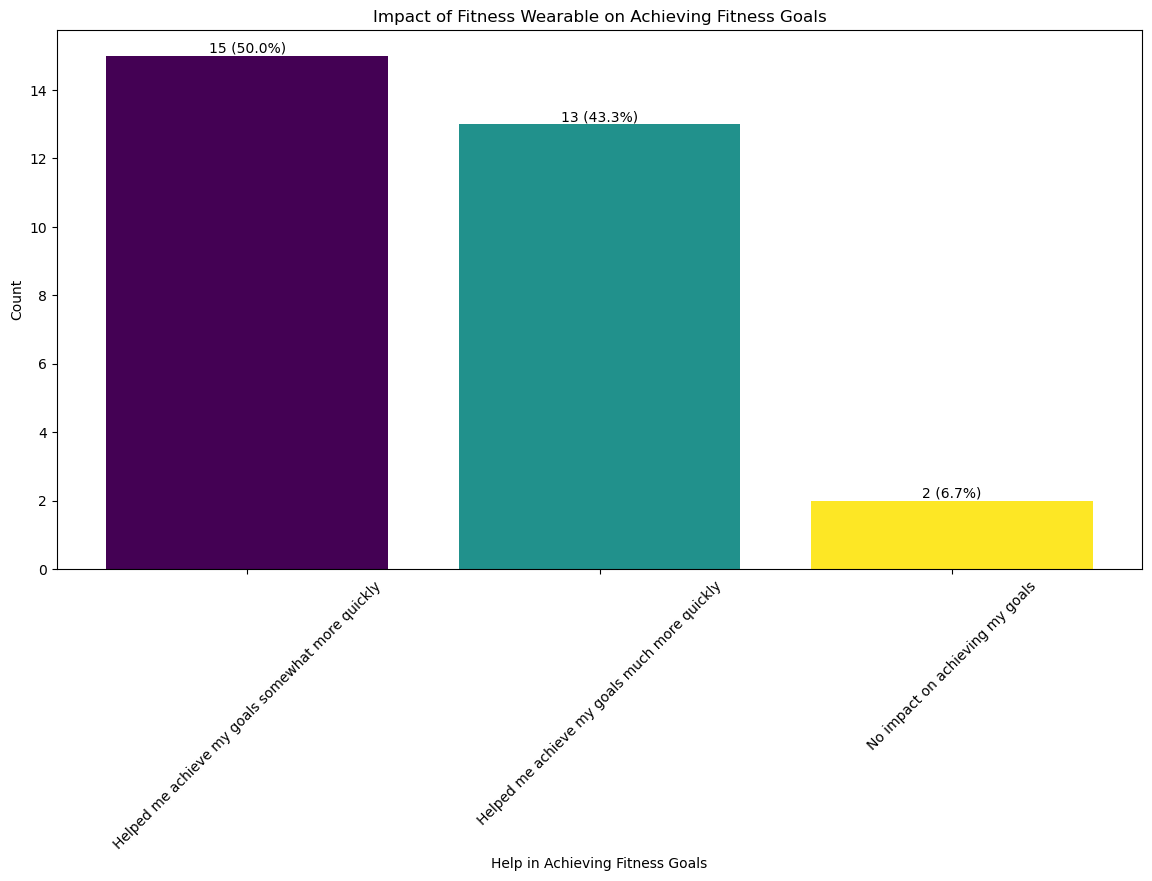

In [71]:
# Count the unique values in the 'Fitness Goals' column
fitness_goals_counts = df['Fitness Goals'].value_counts()
print(fitness_goals_counts)
# Create a bar plot
fig, ax = plt.subplots(figsize=(14, 7))
bars = ax.bar(fitness_goals_counts.index, fitness_goals_counts, color=plt.cm.viridis(np.linspace(0, 1, len(fitness_goals_counts))))

ax.set_xlabel('Help in Achieving Fitness Goals')
ax.set_ylabel('Count')
ax.set_title('Impact of Fitness Wearable on Achieving Fitness Goals')

# Add count labels and percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    percentage = (height / fitness_goals_counts.sum()) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)} ({percentage:.1f}%)', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


### 16. How has the fitness wearable impacted their overall health?

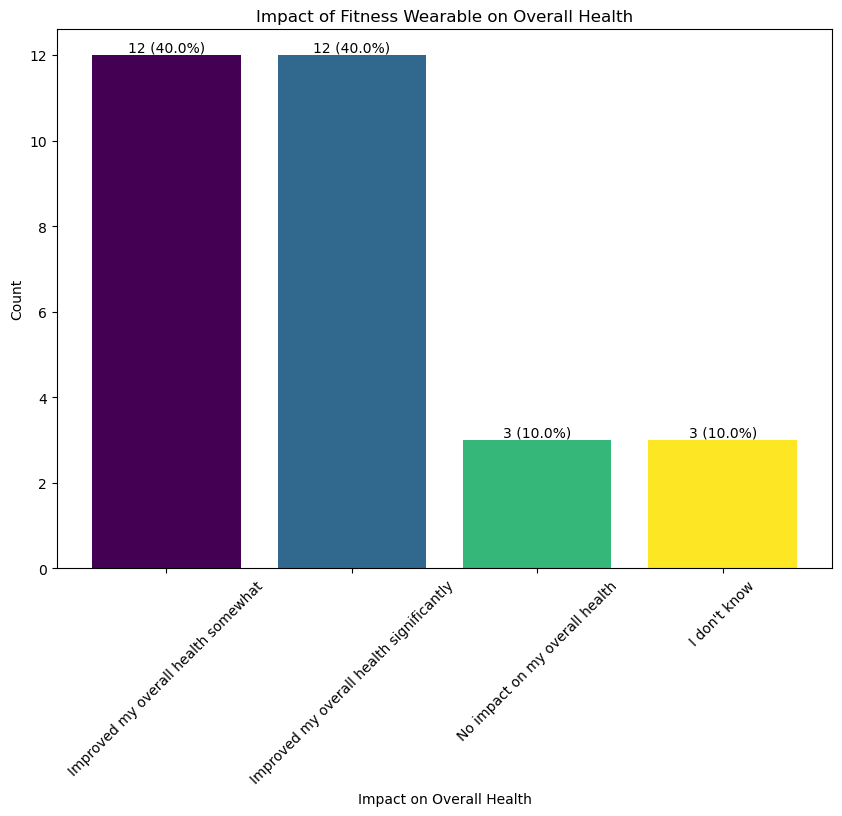

In [72]:
# Count the unique values in the 'Health' column
health_counts = df['Health'].value_counts()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(health_counts.index, health_counts, color=plt.cm.viridis(np.linspace(0, 1, len(health_counts))))

ax.set_xlabel('Impact on Overall Health')
ax.set_ylabel('Count')
ax.set_title('Impact of Fitness Wearable on Overall Health')

# Add count labels and percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    percentage = (height / health_counts.sum()) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)} ({percentage:.1f}%)', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


### 17. Has the fitness wearable improved their sleep patterns?

Agree             14
Strongly agree    10
Neutral            5
Disagree           1
Name: Sleep, dtype: int64


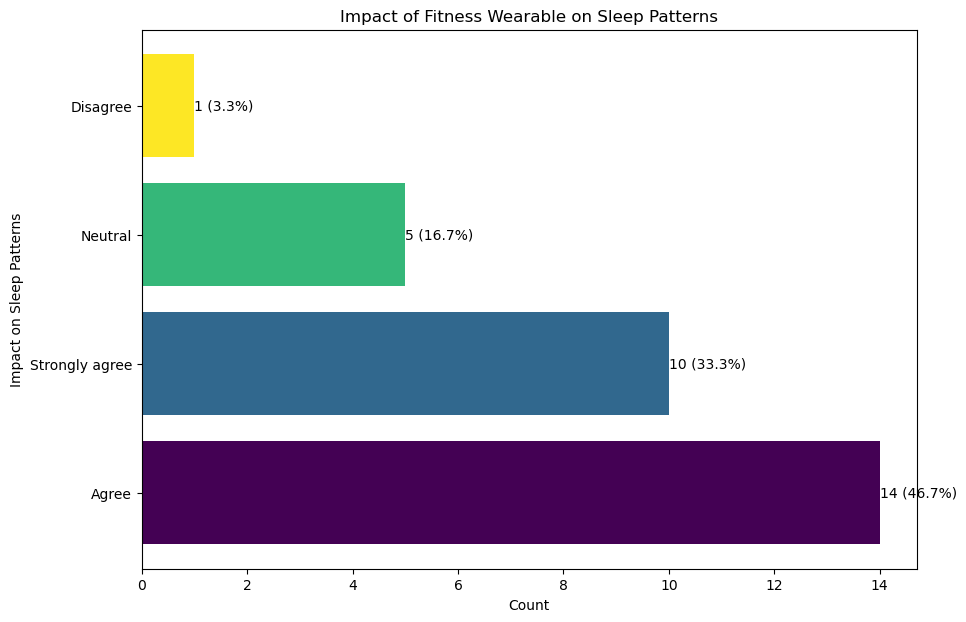

In [73]:
# Count the unique values in the 'Sleep' column
sleep_counts = df['Sleep'].value_counts()
print(sleep_counts)
# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(sleep_counts.index, sleep_counts, color=plt.cm.viridis(np.linspace(0, 1, len(sleep_counts))))

ax.set_xlabel('Count')
ax.set_ylabel('Impact on Sleep Patterns')
ax.set_title('Impact of Fitness Wearable on Sleep Patterns')

# Add count labels and percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    percentage = (width / sleep_counts.sum()) * 100
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)} ({percentage:.1f}%)', va='center')

plt.show()


### 18. Do you feel that the fitness wearable has improved their overall well-being?

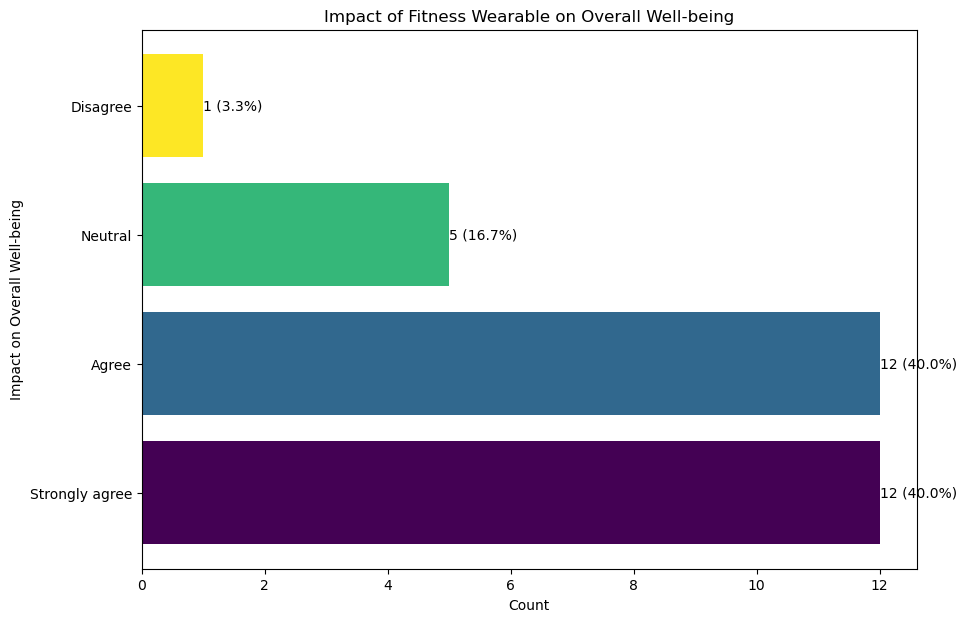

In [74]:
# Count the unique values in the 'Well Being' column
well_being_counts = df['Well Being'].value_counts()

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(well_being_counts.index, well_being_counts, color=plt.cm.viridis(np.linspace(0, 1, len(well_being_counts))))

ax.set_xlabel('Count')
ax.set_ylabel('Impact on Overall Well-being')
ax.set_title('Impact of Fitness Wearable on Overall Well-being')

# Add count labels and percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    percentage = (width / well_being_counts.sum()) * 100
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)} ({percentage:.1f}%)', va='center')

plt.show()


### 19. Has using a fitness wearable influenced their decision? [To exercise more?]

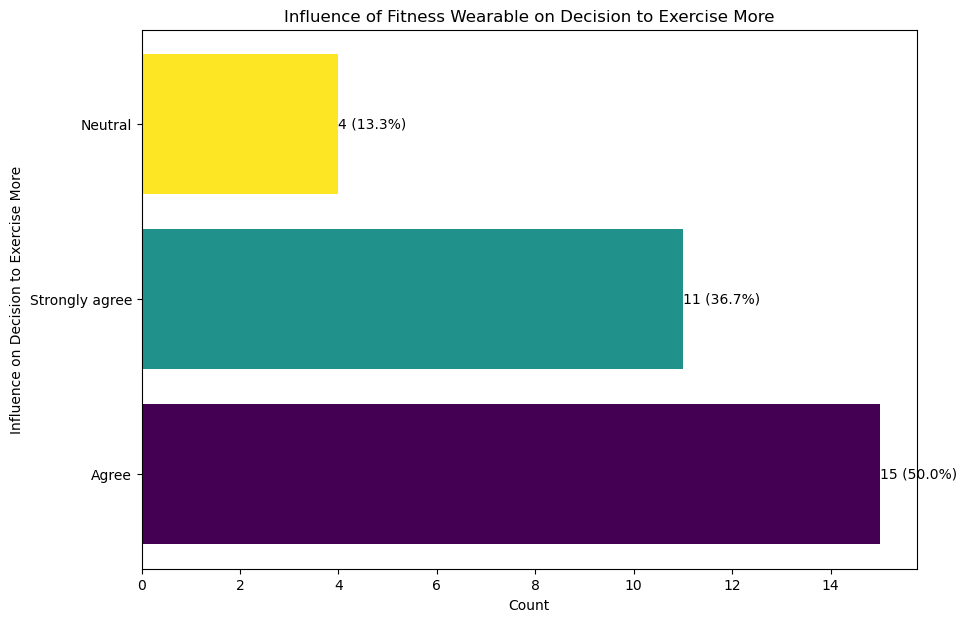

In [75]:
# Count the unique values in the 'Exercise More' column
exercise_more_counts = df['Exercise More'].value_counts()

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(exercise_more_counts.index, exercise_more_counts, color=plt.cm.viridis(np.linspace(0, 1, len(exercise_more_counts))))

ax.set_xlabel('Count')
ax.set_ylabel('Influence on Decision to Exercise More')
ax.set_title('Influence of Fitness Wearable on Decision to Exercise More')

# Add count labels and percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    percentage = (width / exercise_more_counts.sum()) * 100
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)} ({percentage:.1f}%)', va='center')

plt.show()


### 20. Has using a fitness wearable influenced their decision? [To purchase other fitness-related products?]

Agree             15
Neutral            8
Strongly agree     5
Disagree           2
Name: Purchase Products, dtype: int64


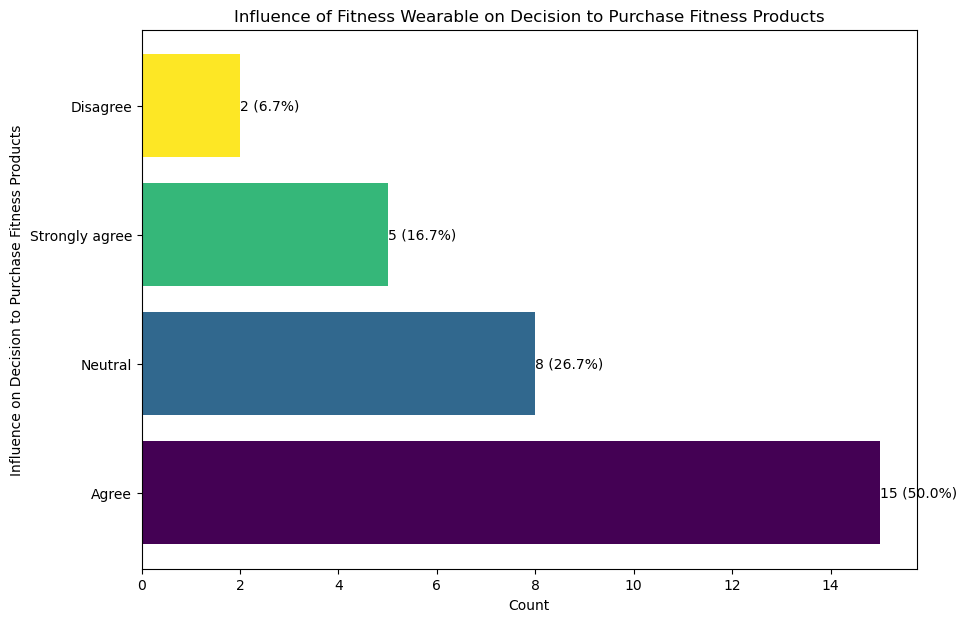

In [76]:
# Count the unique values in the 'Purchase Products' column
purchase_products_counts = df['Purchase Products'].value_counts()
print(purchase_products_counts)
# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(purchase_products_counts.index, purchase_products_counts, color=plt.cm.viridis(np.linspace(0, 1, len(purchase_products_counts))))

ax.set_xlabel('Count')
ax.set_ylabel('Influence on Decision to Purchase Fitness Products')
ax.set_title('Influence of Fitness Wearable on Decision to Purchase Fitness Products')

# Add count labels and percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    percentage = (width / purchase_products_counts.sum()) * 100
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)} ({percentage:.1f}%)', va='center')

plt.show()


### 21. Has using a fitness wearable influenced their decision? [To join a gym or fitness class?]'

Agree             15
Strongly agree     9
Neutral            6
Name: Join Gym, dtype: int64


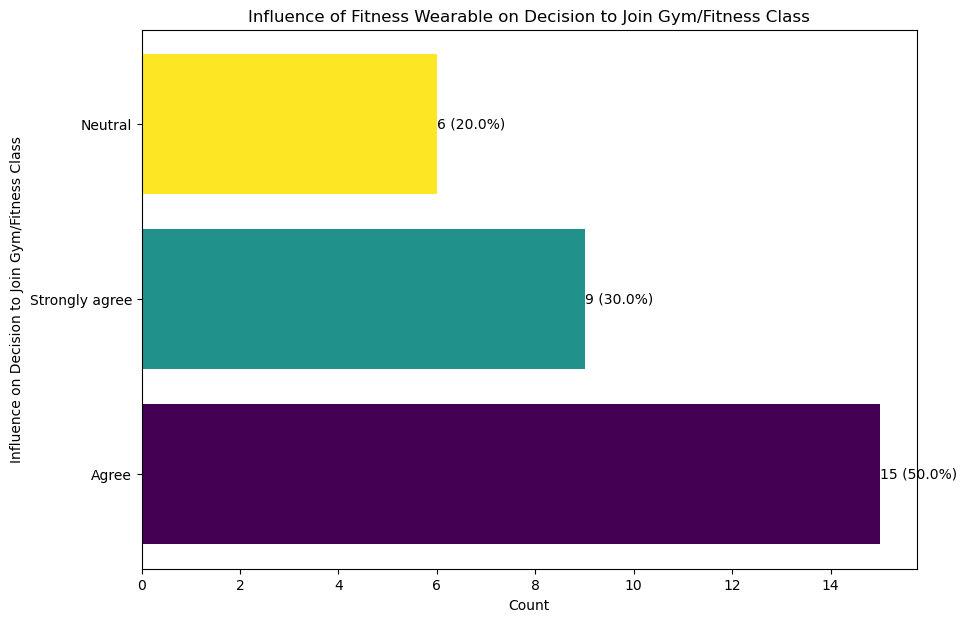

In [77]:
# Count the unique values in the 'Join Gym' column
join_gym_counts = df['Join Gym'].value_counts()
print(join_gym_counts)
# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(join_gym_counts.index, join_gym_counts, color=plt.cm.viridis(np.linspace(0, 1, len(join_gym_counts))))

ax.set_xlabel('Count')
ax.set_ylabel('Influence on Decision to Join Gym/Fitness Class')
ax.set_title('Influence of Fitness Wearable on Decision to Join Gym/Fitness Class')

# Add count labels and percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    percentage = (width / join_gym_counts.sum()) * 100
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)} ({percentage:.1f}%)', va='center')

plt.show()


### 22. Has using a fitness wearable influenced their decision? [To change their diet?]

Agree             14
Strongly agree    12
Neutral            4
Name: Change Diet, dtype: int64


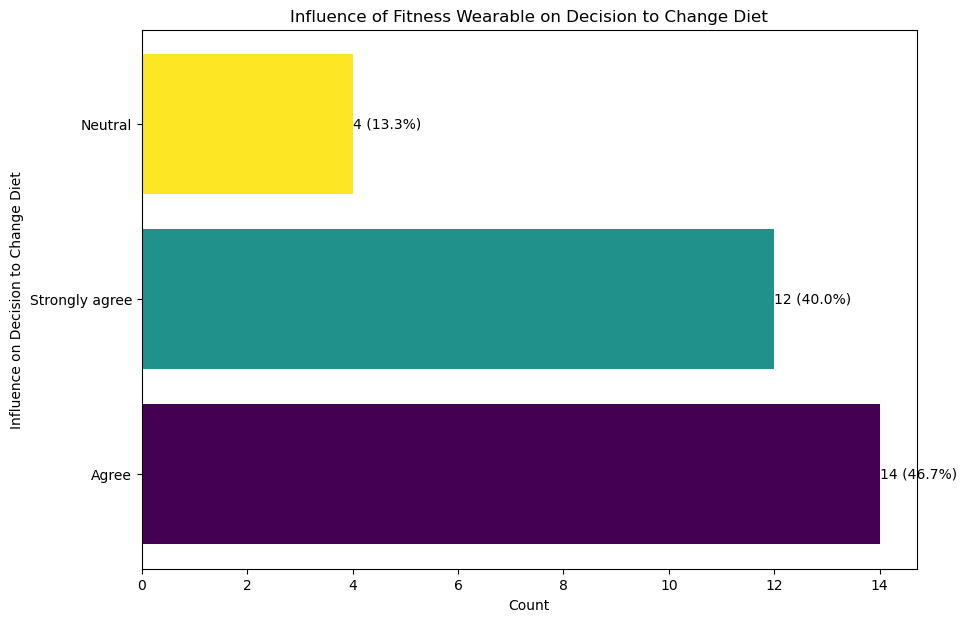

In [78]:
# Count the unique values in the 'Change Diet' column
change_diet_counts = df['Change Diet'].value_counts()
print(change_diet_counts)
# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(change_diet_counts.index, change_diet_counts, color=plt.cm.viridis(np.linspace(0, 1, len(change_diet_counts))))

ax.set_xlabel('Count')
ax.set_ylabel('Influence on Decision to Change Diet')
ax.set_title('Influence of Fitness Wearable on Decision to Change Diet')

# Add count labels and percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    percentage = (width / change_diet_counts.sum()) * 100
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)} ({percentage:.1f}%)', va='center')

plt.show()
